# Code to Convert FEC .txt Files to .css Dicitionaries

Warning: Abstraction level is not that high (will need to modify code if applied to other files)

In [41]:
# TITLE
import csv
import itertools
import pandas as pd
import numpy as np

## my question: what are possible correlations amount and time of donation, and what are their relative impacts?

# txt_file = r"/Users/alexalmond/CampaignFinance/indiv16/itcont.txt"
# csv_file = r"/Users/alexalmond/CampaignFinance/indiv16/itcont.csv"

# indv_2commitee_header = ['CMTE_ID', 'AMNDT_IND', 'RPT_TP', 'TRANSACTION_PGI', 'IMAGE_NUM', 'TRANSACTION_TP', 'ENTITY_TP' ,'NAME', 'CITY', 'STATE', 'ZIP_CODE', 'EMPLOYER', 'OCCUPATION', 'TRANSACTION_DT', 'TRANSACTION_AMT',
#                          'OTHER_ID', 'TRAN_ID', 'FILE_NUM', 'MEMO_CD', 'MEMO_TEXT', 'SUB_ID']


cmite_cont2_TH_txt = r"/Users/alexalmond/CampaignFinance/c_to_candidates.txt"
cmite_cont2_TH_csv = r"/Users/alexalmond/CampaignFinance/c_to_candidates.csv"

cmite_cont2_TH_txt1 = r"/Users/alexalmond/CampaignFinance/c_to_candidates.txt"
cmite_cont2_TH_csv1 = r"/Users/alexalmond/CampaignFinance/c_to_candidates1.csv"

cmite_cont2_TH_header = ['CMTE_ID',	'MNDT_IND',	'RPT_TP', 'TRANSACTION_PGI', 'IMAGE_NUM', 'TRANSACTION_TP',	'ENTITY_TP', 'NAME',
                         'CITY',	'STATE', 'ZIP_CODE', 'EMPLOYER', 'OCCUPATION',	'TRANSACTION_DT',	'TRANSACTION_AMT',	'OTHER_ID',	'CAND_ID',	'TRAN_ID',	'FILE_NUM',	'MEMO_CD',	'MEMO_TEXT', 'SUB_ID']
Trump_ID = "P80001571"
Clinton_ID = "P00003392"

#converts the txt FEC files to CSV files
#also, adds headers to the converted CSV files and gives them header lookup power

def dictify(txt, csvv, fieldnames, cand, cID1, cID2):

    in_txt = csv.reader(open(txt, "rb"), delimiter = '|')

    dictwriter = csv.DictWriter(open(csvv, 'wb'), fieldnames = fieldnames)

    dictwriter.writeheader()

    dictionary = {}

    for row in in_txt:
        if cand != 0 and len(row[13]) >= 3:
            if row[cand] == cID1:
                dictionary = {}
                i = 0
                for column in row:
                    dictionary[fieldnames[i]] = column
                    i += 1
                dictwriter.writerow(dictionary)
            elif row[cand] == cID2:
            	dictionary = {}
                i = 0
                for column in row:
                    dictionary[fieldnames[i]] = column
                    i += 1
                dictwriter.writerow(dictionary)
                
def dictify2(txt, csvv, fieldnames, cand, cID1, cID2):

    in_txt = csv.reader(open(txt, "rb"), delimiter = '|')

    dictwriter = csv.DictWriter(open(csvv, 'wb'), fieldnames = fieldnames)

    dictwriter.writeheader()

    dictionary = {}

    for row in in_txt:
        if cand != 0 and len(row[13]) >= 3 and row[14] > 1000000:
            if row[cand] == cID1:
                dictionary = {}
                i = 0
                for column in row:
                    dictionary[fieldnames[i]] = column
                    i += 1
                dictwriter.writerow(dictionary)
            elif row[cand] == cID2:
            	dictionary = {}
                i = 0
                for column in row:
                    dictionary[fieldnames[i]] = column
                    i += 1
                dictwriter.writerow(dictionary)

# dictify(cmite_cont2_TH_txt, cmite_cont2_TH_csv, cmite_cont2_TH_header, 16, 'P80001571', 'P00003392')

# dictify2(cmite_cont2_TH_txt1, cmite_cont2_TH_csv1, cmite_cont2_TH_header, 16, 'P80001571', 'P00003392')




# Size of Donation versus Time of Donation

Are there any correlations between the two data?

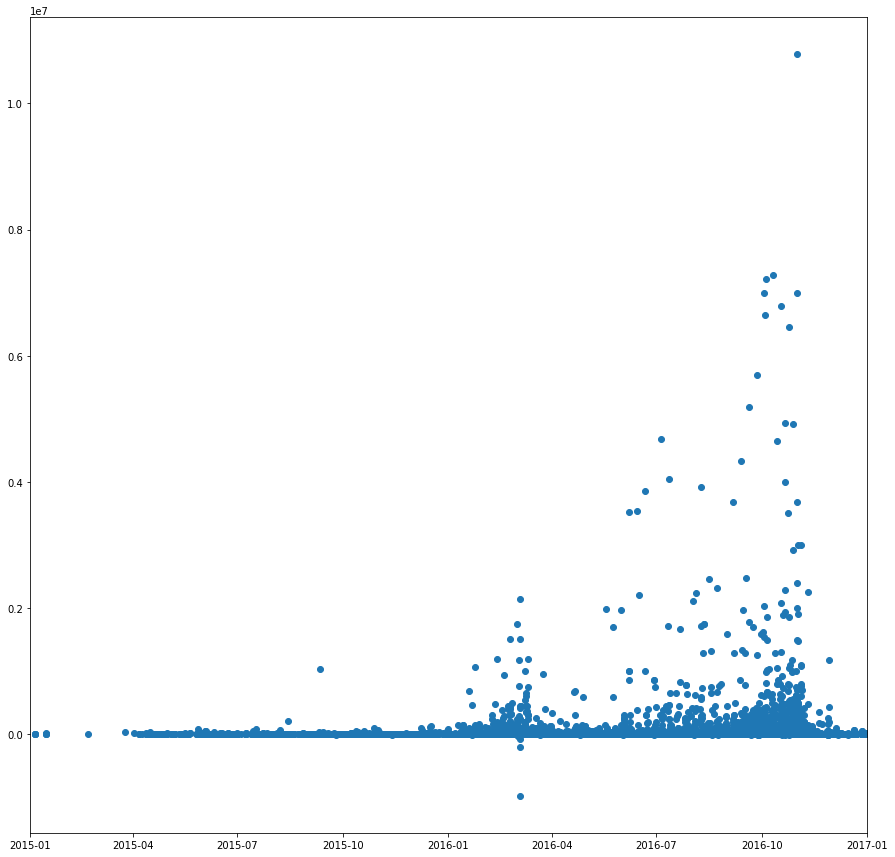

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt


# plot of amount versus time donated

datafy = pd.read_csv("/Users/alexalmond/CampaignFinance/c_to_candidates.csv", parse_dates=["TRANSACTION_DT"])


date_array = np.array(datafy["TRANSACTION_DT"])
amount_array = np.array(datafy["TRANSACTION_AMT"])

parse_date = lambda date: dt.datetime.strptime(date, "%d%m%Y'")

def convert(date):
    new_date = ''
    if date[0:2] == '01':
        new_date = date[2:4]+ 'JAN' + date[4:]
    elif date[0:2] == '02':
        new_date = date[2:4]+ 'FEB' + date[4:]
    elif date[0:2] == '03':
        new_date = date[2:4]+ 'MAR' + date[4:]
    elif date[0:2] == '04':
        new_date = date[2:4]+ 'APR' + date[4:]
    elif date[0:2] == '05':
        new_date = date[2:4]+ 'MAY' + date[4:]
    elif date[0:2] == '06':
        new_date = date[2:4]+ 'JUN' + date[4:]
    elif date[0:2] == '07':
        new_date = date[2:4]+ 'JUL' + date[4:]
    elif date[0:2] == '08':
        new_date = date[2:4]+ 'AUG' + date[4:]
    elif date[0:2] == '09':
        new_date = date[2:4]+ 'SEP' + date[4:]
    elif date[0:2] == '10':
        new_date = date[2:4]+ 'OCT' + date[4:]
    elif date[0:2] == '11':
        new_date = date[2:4]+ 'NOV' + date[4:]
    elif date[0:2] == '12':
        new_date = date[2:4]+ 'DEC'+ date[4:]
    return new_date
    
parse_date = lambda date: dt.datetime.strptime(date, '%d%b%Y')


# if no donation_size or from_date, pass in each paramerter with string 'none'

def convert_array(d_array, a_array, donation_size, from_date):
    
    total_array = [[] for y in range(2)] 
    
    nd_array = []
    na_array = []
            
    if donation_size == 'none' and from_date == 'none':
        for i in range(len(d_array)): 
            nd_array.append(parse_date(convert(d_array[i])))
            na_array.append(a_array[i])
        pass
            
    if donation_size != 'none' and from_date == 'none':
        for i in range(len(d_array)):    
            amount = a_array[i]
            date = parse_date(convert(d_array[i]))  
            if amount > donation_size:
                na_array.append(amount)
                nd_array.append(date)
        pass
                
    if donation_size == 'none' and from_date != 'none':
        for i in range(len(d_array)):     
            amount = a_array[i]
            date = parse_date(convert(d_array[i]))   
            if date.date() > from_date.date():       
                na_array.append(amount)
                nd_array.append(date)       
        pass
                           
    if donation_size != 'none' and from_date != 'none':           
        for i in range(len(d_array)): 
            amount = a_array[i]
            date = parse_date(convert(d_array[i]))
            if amount > donation_size and date.date() > from_date.date():
                na_array.append(amount)
                nd_array.append(date)  
                    
    total_array[0] = nd_array
    total_array[1] = na_array
    
    return total_array

total = convert_array(date_array, amount_array, 'none', 'none')

total_donations = plt.scatter(total[0] , total[1])

plt.subplot().set_xlim([parse_date(convert('01012015')), parse_date(convert('01012017'))])

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

plt.show()

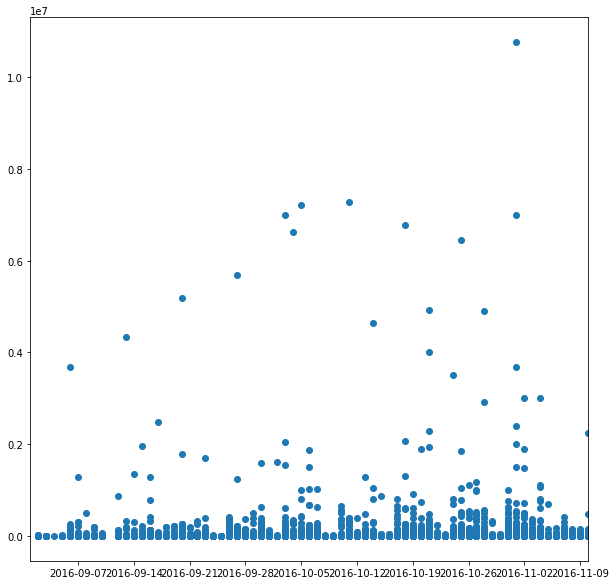

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt


last2m = convert_array(date_array, amount_array, 'none', parse_date(convert('09012016')))

last2m_donations = plt.scatter(last2m[0] , last2m[1])
plt.subplot().set_xlim([parse_date(convert('09012016')), parse_date(convert('11102016'))])

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

plt.show()






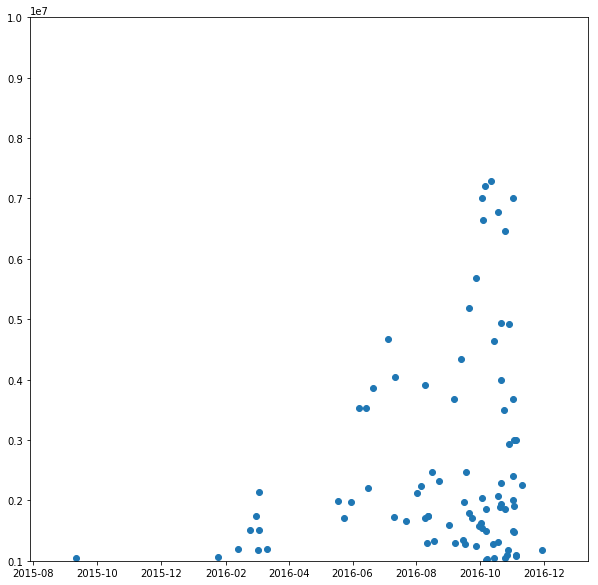

In [44]:
datafy = pd.read_csv("/Users/alexalmond/CampaignFinance/c_to_candidates.csv", parse_dates=["TRANSACTION_DT"])


date_array = np.array(datafy["TRANSACTION_DT"])
amount_array = np.array(datafy["TRANSACTION_AMT"])

parse_date = lambda date: dt.datetime.strptime(date, "%d%m%Y'")

def convert(date):
    new_date = ''
    if date[0:2] == '01':
        new_date = date[2:4]+ 'JAN' + date[4:]
    elif date[0:2] == '02':
        new_date = date[2:4]+ 'FEB' + date[4:]
    elif date[0:2] == '03':
        new_date = date[2:4]+ 'MAR' + date[4:]
    elif date[0:2] == '04':
        new_date = date[2:4]+ 'APR' + date[4:]
    elif date[0:2] == '05':
        new_date = date[2:4]+ 'MAY' + date[4:]
    elif date[0:2] == '06':
        new_date = date[2:4]+ 'JUN' + date[4:]
    elif date[0:2] == '07':
        new_date = date[2:4]+ 'JUL' + date[4:]
    elif date[0:2] == '08':
        new_date = date[2:4]+ 'AUG' + date[4:]
    elif date[0:2] == '09':
        new_date = date[2:4]+ 'SEP' + date[4:]
    elif date[0:2] == '10':
        new_date = date[2:4]+ 'OCT' + date[4:]
    elif date[0:2] == '11':
        new_date = date[2:4]+ 'NOV' + date[4:]
    elif date[0:2] == '12':
        new_date = date[2:4]+ 'DEC'+ date[4:]
    return new_date
    
parse_date = lambda date: dt.datetime.strptime(date, '%d%b%Y')


# if no donation_size or from_date, pass in each paramerter with string 'none'

def convert_array(d_array, a_array, donation_size, from_date):
    
    total_array = [[] for y in range(2)] 
    
    nd_array = []
    na_array = []
            
    if donation_size == 'none' and from_date == 'none':
        for i in range(len(d_array)): 
            nd_array.append(parse_date(convert(d_array[i])))
            na_array.append(a_array[i])
        pass
            
    if donation_size != 'none' and from_date == 'none':
        for i in range(len(d_array)):    
            amount = a_array[i]
            date = parse_date(convert(d_array[i]))  
            if amount > donation_size:
                na_array.append(amount)
                nd_array.append(date)
        pass
                
    if donation_size == 'none' and from_date != 'none':
        for i in range(len(d_array)):     
            amount = a_array[i]
            date = parse_date(convert(d_array[i]))   
            if date.date() > from_date.date():       
                na_array.append(amount)
                nd_array.append(date)       
        pass
                           
    if donation_size != 'none' and from_date != 'none':           
        for i in range(len(d_array)): 
            amount = a_array[i]
            date = parse_date(convert(d_array[i]))
            if amount > donation_size and date.date() > from_date.date():
                na_array.append(amount)
                nd_array.append(date)  
                    
    total_array[0] = nd_array
    total_array[1] = na_array
    
    return total_array

total = convert_array(date_array, amount_array, 1000000, 'none')

total_donations = plt.scatter(total[0] , total[1])

plt.subplot().set_ylim([1000000, 10000000])

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

plt.show()

Graph 1) All donations, from all committees, with no contstraints

Graph 2) Only donations given 2 months away from election time

Graph 3) Only donations given that are more than 1 million dollars.

Conclusion:

A remarkable correlation is observed: closer to election day, the larger the donation. This seems counter-intuitve, as the campaign shoud be reaching its end and thus expenses should begin to decline. Perhaps this can be better answerd by examining who donated so much and so late in the campaign fo both Hillary and Trump.

# Who Donated so Much and why so Late in the Campaign?

This part is unfinished.

In [45]:
import csv
import itertools
import pandas as pd
import numpy as np


committee_header = ['CMTE_ID', 'CMTE_NM', 'TRES_NM', 'CMTE_ST1', 'CMTE_ST2', 'CMTE_CITY', 'CMTE_ST', 'CMTE_ZIP', 'CMTE_DSGN', 'CMTE_TP', 'CMTE_PTY_AFFILIATION', 'CMTE_FILING_FREQ', 'ORG_TP', 'CONNECTED_ORG_NM', 'CAND_ID']

commitees_txt = r"/Users/alexalmond/CampaignFinance/commitees.txt"
commitees_csv = r"/Users/alexalmond/CampaignFinance/commitees.csv"

def dictify_gen(txt, csvv, fieldnames):

    in_txt = csv.reader(open(txt, "rb"), delimiter = '|')

    dictwriter = csv.DictWriter(open(csvv, 'wb'), fieldnames = fieldnames)

    dictwriter.writeheader()

    dictionary = {}

    for row in in_txt:
        dictionary = {}
        i = 0
        for column in row:
            dictionary[fieldnames[i]] = column
            i += 1
        dictwriter.writerow(dictionary)
        
# dictify_gen(commitees_txt, commitees_csv, committee_header)  


com = pd.read_csv(r"/Users/alexalmond/CampaignFinance/commitees.csv", sep=',',header=0)



In [46]:
import csv
import itertools
import pandas as pd
import numpy as np

com = pd.read_csv(r"/Users/alexalmond/CampaignFinance/commitees.csv", sep=',',header=0)

com_to_can = pd.read_csv(r"/Users/alexalmond/CampaignFinance/c_to_candidates1.csv", sep=',',header=0,)

comparison = pd.DataFrame(columns=['CMTE_NM', 'TRANSACTION_AMT', 'CAND_ID', 'TRANSACTION_DT'])


def construct_comparison(t1, t2): 
    
    comids1 = t1['CMTE_ID']
    comids2 = t2['CMTE_ID']
    
    i = 0
    for x in comids1:
        h = 0
        for y in comids2:
            if x == y:
                print(x)
                comparison[i] = [x, t2['TRANSACTION_AMT'][h], t2['CAND_ID'][h], t2['TRANSACTION_DT'][h]]
                i += 1
    h += 1
    
# table = construct_comparison(com, com_to_can) 
                    